<a href="https://colab.research.google.com/github/SelvamRaju/Neural-Networks/blob/main/Part_2_Neural_Networkipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Domain : Autonomous Vehicles**

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.7.0'

In [2]:
#imports
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## **1. Import data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Assinging the data from google drive to Pandas data frame
h5_data = h5py.File('/content/drive/MyDrive/Colab Notebooks/Data/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [5]:
h5_data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

## **2. Data pre-processing and visualisation**

In [6]:
# Loading Test, Training and validation data to variables
X_train = h5_data['X_train'][:]
X_test = h5_data['X_test'][:]
X_val = h5_data['X_val'][:]
y_train = h5_data['y_train'][:]
y_test = h5_data['y_test'][:]
y_val = h5_data['y_val'][:]

In [7]:
# Closing the large h5 file
h5_data.close()

In [8]:
# Displaying the actual shapes
print('X Train shape - ', X_train.shape)
print('X Test shape - ', X_test.shape)
print('X val shape - ', X_val.shape)
print('y Train shape - ', y_train.shape)
print('y Test shape - ', y_test.shape)
print('y val shape - ', y_val.shape)


X Train shape -  (42000, 32, 32)
X Test shape -  (18000, 32, 32)
X val shape -  (60000, 32, 32)
y Train shape -  (42000,)
y Test shape -  (18000,)
y val shape -  (60000,)


Label for the below image is 2


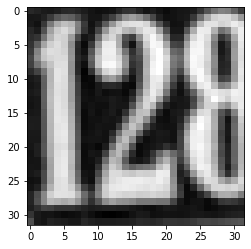

In [9]:
# Displaying first data from dataset along with label
plt.imshow(X_train[0],cmap='gray')
print(f'Label for the below image is {y_train[0]}')

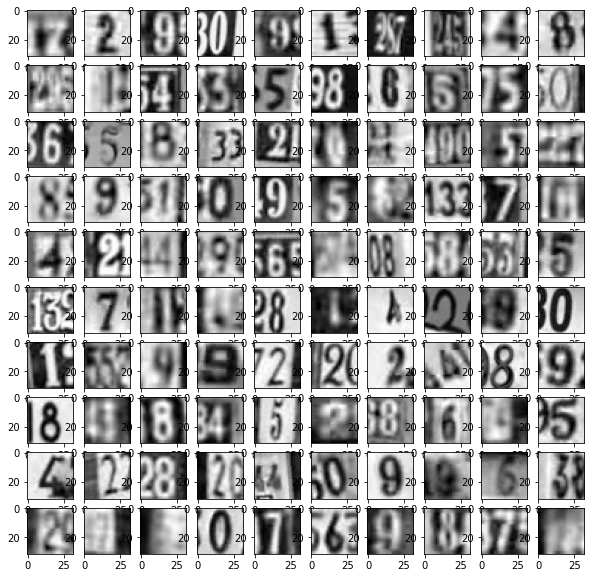

In [10]:
# Visualizing the dataset
fig = plt.figure(figsize = (10, 10))
columns = 10
rows = 10
for i in range(1, columns * rows + 1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')
plt.show()

In [11]:
# Resizing/Reshaping dataset - 3d data to 2d data conversion

X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

# Grayscale Image has values ranging from 0-255. Normalizing it to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Reshaped X Train - ', X_train.shape)
print('Reshaped X Test - ', X_test.shape)
print('Reshaped y Train - ', y_train.shape)
print('Reshaped y Test - ', y_test.shape)



Reshaped X Train -  (42000, 1024, 1)
Reshaped X Test -  (18000, 1024, 1)
Reshaped y Train -  (42000,)
Reshaped y Test -  (18000,)


In [12]:
# One hot encoding for the target variable
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_types = y_test.shape[1] 
print("No of Types (Numbers):",num_types)


No of Types (Numbers): 10


Label for 1 is 2
Label for 2 is 6
Label for 3 is 7
Label for 4 is 4
Label for 5 is 4
Label for 6 is 0
Label for 7 is 3
Label for 8 is 0
Label for 9 is 7
Label for 10 is 3


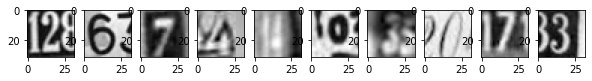

In [13]:
# checking the dataset if normalizing and reshaping is accurate

plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    print(f'Label for {i+1} is {np.argmax(y_train[0:10][i])}')

## **3.Design, train, tune and test a neural network image classifier**

In [14]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def number_model():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_types, activation='softmax'))
    return model

In [15]:
# Assinging the built model to 'model' variable
model = number_model()

In [16]:
# Model Compilation
sgd = optimizers.Adam(learning_rate=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 


In [17]:
# Model Fitting

fitting_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
140/140 - 3s - loss: 2.3037 - accuracy: 0.1093 - val_loss: 2.2785 - val_accuracy: 0.1488 - 3s/epoch - 20ms/step
Epoch 2/100
140/140 - 2s - loss: 2.0728 - accuracy: 0.2265 - val_loss: 1.8305 - val_accuracy: 0.3400 - 2s/epoch - 13ms/step
Epoch 3/100
140/140 - 2s - loss: 1.6944 - accuracy: 0.3950 - val_loss: 1.5493 - val_accuracy: 0.4567 - 2s/epoch - 13ms/step
Epoch 4/100
140/140 - 2s - loss: 1.4886 - accuracy: 0.4984 - val_loss: 1.4096 - val_accuracy: 0.5265 - 2s/epoch - 13ms/step
Epoch 5/100
140/140 - 2s - loss: 1.3465 - accuracy: 0.5567 - val_loss: 1.3009 - val_accuracy: 0.5892 - 2s/epoch - 13ms/step
Epoch 6/100
140/140 - 2s - loss: 1.2248 - accuracy: 0.6069 - val_loss: 1.1748 - val_accuracy: 0.6229 - 2s/epoch - 13ms/step
Epoch 7/100
140/140 - 2s - loss: 1.1733 - accuracy: 0.6235 - val_loss: 1.1101 - val_accuracy: 0.6493 - 2s/epoch - 13ms/step
Epoch 8/100
140/140 - 2s - loss: 1.1027 - accuracy: 0.6500 - val_loss: 1.0830 - val_accuracy: 0.6565 - 2s/epoch - 13ms/step
Epoch 9/

## **4. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.**

In [18]:
# Model Evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.6636293530464172
Accuracy: 0.8173333406448364


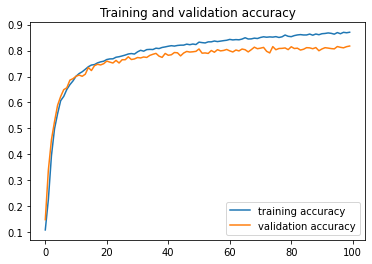

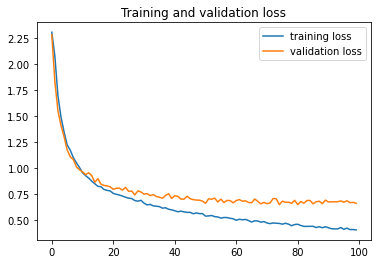

In [19]:
accuracy      = fitting_model.history['accuracy']
val_accuracy  = fitting_model.history['val_accuracy']
loss     = fitting_model.history['loss']
val_loss = fitting_model.history['val_loss']

epochs   = range(len(accuracy))

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.title ('Training and validation loss')
plt.legend(loc = 'upper right')




*   Model is built with 10 types of image number combo ranging from 0-9
*   It is noticed that after certain threshold point validation accuracy begins to decrease in the first plot.
* And in the second plot gradually the validation loss kept increasing.
* So with this model we were able to gain 81.7% accuracy in detecting the numbers from the image.

